In [ ]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the training data
df = pd.read_csv('train.csv', parse_dates=['date'])

# Sort the data
df.sort_values(['store', 'item', 'date'], inplace=True)

# Normalize sales data
scaler = MinMaxScaler()
df['sales'] = scaler.fit_transform(df[['sales']])


In [ ]:
#create sequences for time series modeling
import numpy as np

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Example for a single store-item combination
store_item_df = df[(df['store'] == 1) & (df['item'] == 1)]
sales_data = store_item_df['sales'].values
seq_length = 30
X, y = create_sequences(sales_data, seq_length)

# Reshape for model input
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
# build and train lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0038
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.7451e-04
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.0459e-04
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.1323e-04
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.2709e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.7909e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.4638e-04
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.7934e-04
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.6961e-04
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.7488e-04


In [ ]:
#evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the training data
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)

print(f'MSE: {mse}, MAE: {mae}')


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
MSE: 0.0005498985132391336, MAE: 0.018433098725278558


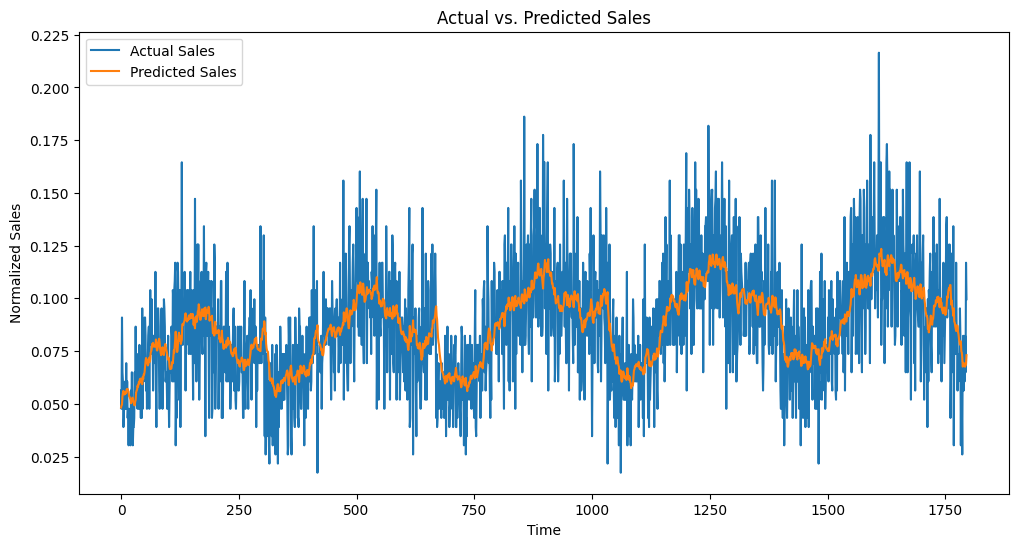

In [ ]:
#visualize the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Normalized Sales')
plt.legend()
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3049
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2553
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2574 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2110
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1858
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1454
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1106
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0613
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0534
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0537
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


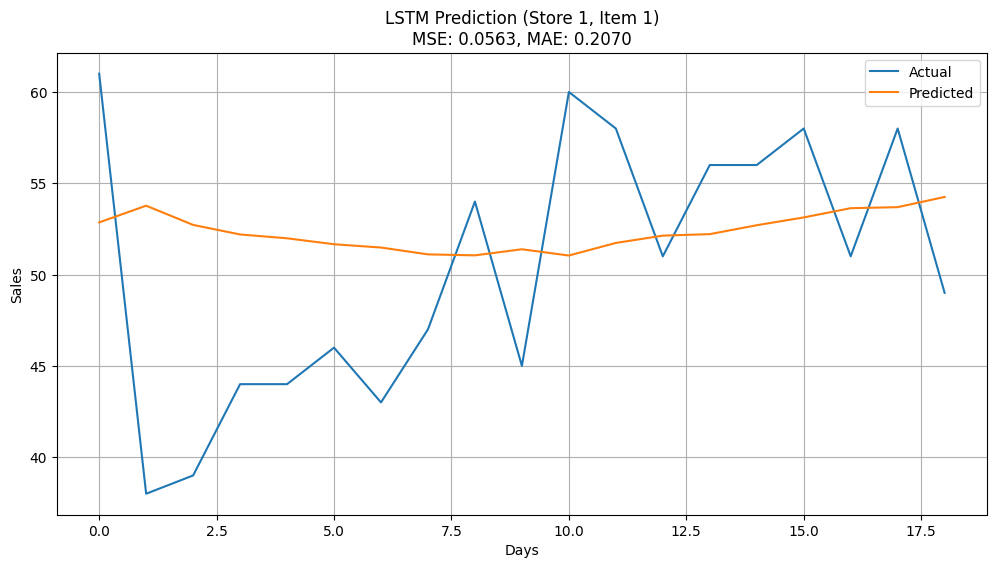

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Simulate Kaggle-like dataset
dates = pd.date_range(start='2013-01-01', periods=1000)
data = {
    'date': dates,
    'store': np.random.choice([1, 2, 3], size=1000),
    'item': np.random.choice([1, 2, 3], size=1000),
    'sales': np.random.poisson(lam=50, size=1000)
}
df = pd.DataFrame(data)

# Filter data for store 1, item 1
filtered_df = df[(df['store'] == 1) & (df['item'] == 1)].sort_values(by='date')
filtered_df.reset_index(drop=True, inplace=True)

# Normalize sales
scaler = MinMaxScaler()
filtered_df['sales'] = scaler.fit_transform(filtered_df[['sales']])

# Sequence preparation
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 30
sales = filtered_df['sales'].values
X, y = create_sequences(sales, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, verbose=1)

# Prediction and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(scaler.inverse_transform(y_pred), label='Predicted')
plt.title(f'LSTM Prediction (Store 1, Item 1)\nMSE: {mse:.4f}, MAE: {mae:.4f}')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2642
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1104 
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0550
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0529
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0594 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0411
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0425
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0445
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0463
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0385
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


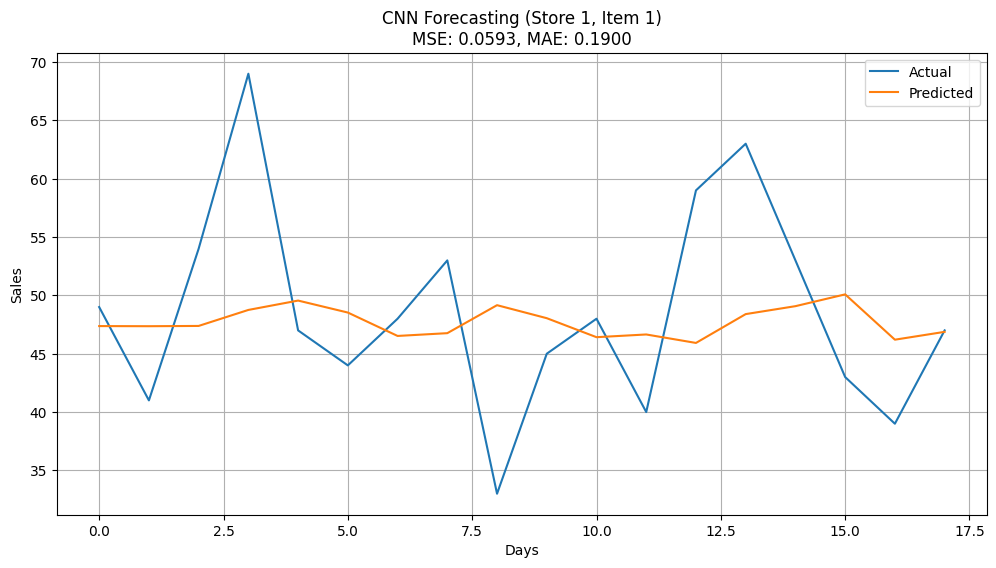

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Simulate Kaggle-style data
dates = pd.date_range(start='2013-01-01', periods=1000)
data = {
    'date': dates,
    'store': np.random.choice([1, 2, 3], size=1000),
    'item': np.random.choice([1, 2, 3], size=1000),
    'sales': np.random.poisson(lam=50, size=1000)
}
df = pd.DataFrame(data)

# Filter for one store-item combo
filtered_df = df[(df['store'] == 1) & (df['item'] == 1)].sort_values(by='date')
filtered_df.reset_index(drop=True, inplace=True)

# Normalize sales
scaler = MinMaxScaler()
filtered_df['sales'] = scaler.fit_transform(filtered_df[['sales']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 30
sales = filtered_df['sales'].values
X, y = create_sequences(sales, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(scaler.inverse_transform(y_pred), label='Predicted')
plt.title(f'CNN Forecasting (Store 1, Item 1)\nMSE: {mse:.4f}, MAE: {mae:.4f}')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.5019
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3623
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2716
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2186
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1589 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1304
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0911 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0573
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0471
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0460 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


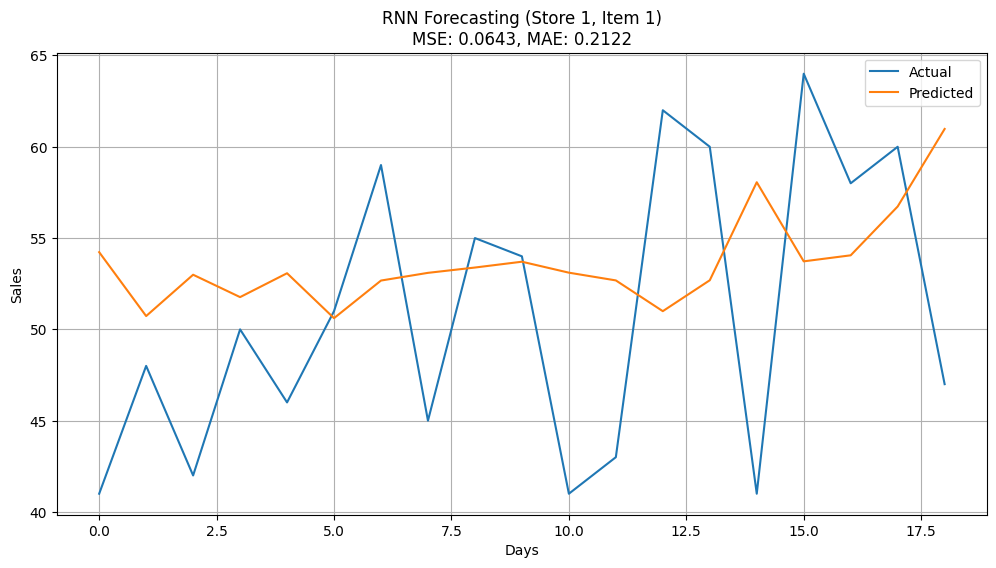

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Simulate Kaggle-style dataset
dates = pd.date_range(start='2013-01-01', periods=1000)
data = {
    'date': dates,
    'store': np.random.choice([1, 2, 3], size=1000),
    'item': np.random.choice([1, 2, 3], size=1000),
    'sales': np.random.poisson(lam=50, size=1000)
}
df = pd.DataFrame(data)

# Filter for store 1, item 1
filtered_df = df[(df['store'] == 1) & (df['item'] == 1)].sort_values(by='date')
filtered_df.reset_index(drop=True, inplace=True)

# Normalize sales
scaler = MinMaxScaler()
filtered_df['sales'] = scaler.fit_transform(filtered_df[['sales']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 30
sales = filtered_df['sales'].values
X, y = create_sequences(sales, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(scaler.inverse_transform(y_pred), label='Predicted')
plt.title(f'RNN Forecasting (Store 1, Item 1)\nMSE: {mse:.4f}, MAE: {mae:.4f}')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
